## 심부전 예측(with 캐글)

심부전이란?

단일 질환명이 아니라 심장의 이상으로 인해 심실의 혈액 충만 혹은 심실의 혈액 박출에 이상이 발생하여 울혈 혹은 피로 등으로 발생하는 임상 증후군을 뜻한다. 심장이 각종 장기와 조직의 대사에 필요한 혈류를 제대로 공급하지 못하는 상태를 통칭한다.


심혈관 질환(CVD)은 전 세계 사망 원인 1위이며 매년 약 1,790만 명이 사망하며 이는 전 세계 사망의 31%를 차지합니다.
심부전은 CVD로 인한 일반적인 사건이며 이 데이터세트에는 심부전으로 인한 사망률을 예측하는 데 사용할 수 있는 12가지 기능이 포함되어 있습니다.

대부분의 심혈관 질환은 흡연, 건강에 해로운 식단 및 비만, 신체 활동 부족 및 유해한 알코올 사용과 같은 행동 위험 요소를 인구 전반에 걸친 전략을 사용하여 해결함으로써 예방할 수 있습니다.

심혈관 질환이 있거나 심혈관 위험이 높은 사람(고혈압, 당뇨병, 고지혈증 또는 이미 확립된 질병과 같은 하나 이상의 위험 요소의 존재로 인해)은 기계 학습 모델이 큰 도움이 될 수 있는 조기 발견 및 관리가 필요합니다.



이 데이터세트를 사용하는 방법은
심부전으로 인한 사망률을 예측하기 위한 모델을 만듭니다.

- Reference
    
    - https://han-py.tistory.com/363

#### 1. 데이터셋 준비하기

데이터를 받아서 아래와 같은 코드를 통해 csv파일을 불러오자

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('./data/heart_failure_clinical_records_dataset.csv')

In [4]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


#### 컬럼
- age: 환자의 나이
- anaemia: 환자의 빈혈증 여부 (0: 정상, 1: 빈혈)
- creatinine_phosphokinase: 크레아틴키나제 검사 결과
- diabetes: 당뇨병 여부 (0: 정상, 1: 당뇨)
- ejection_fraction: 박출계수 (%)
- high_blood_pressure: 고혈압 여부 (0: 정상, 1: 고혈압)
- platelets: 혈소판 수 (kiloplatelets/mL)
- serum_creatinine: 혈중 크레아틴 레벨 (mg/dL)
- serum_sodium: 혈중 나트륨 레벨 (mEq/L)
- sex: 성별 (0: 여성, 1: 남성)
- smoking: 흡연 여부 (0: 비흡연, 1: 흡연)
- time: 관찰 기간 (일)
- DEATH_EVENT: 사망 여부 (0: 생존, 1: 사망) 종속변수

#### EDA 분석

우선은 head()사용해서 값들을 보자.

In [5]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


age, platelets, serum_creatinine 는 float 형식임을 확인

info() 를 통해 알 수 있는 것은, 데이터 타입, 대부분 int이지만, 몇몇개는 float인것은 알 수 있다. 깔끔한 데이터 임을 확인했다.

In [9]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


describe()를 통해 알 수 있는 것은 갯수, 평균, 최소값, 하위25프로값, 중간값, 상위25프로값, 최대값을 볼수 있다. 우선 0과 1로 이루어진 데이터들을 확인해야한다. smoking의 평균을 보면 0.3정도로 비흡연자가 많다는 것을 알 수 있다. 비흡연자가 많긴하지만, 언벨런스한 데이터는 아니기 때문에 사용해도 무방하다. 그리고 과도하게 큰값이나 작은 값이 있는지를 확인하자. creatinine_phosphokinase를 보면 max값이 7861로 상당히 큰편이므로 outlier로 배제를 할 필요가 있다.

describe()를 통해 알 수 있는 것은 갯수, 평균, 최소, 하위25%, 중간값 상위 25% ,최대값을 볼 수 있다. 우선 0과 1로 이루어진 데이터들을 확인하자. smoking의 평균을 보면 0.3 정도로 비흡연자가 많다는 것을 알 수 있다. 비흡연자가 많긴 하지만, 언벨러스한 데이터는 아니기 때문에 사용해도 무방하다. 그리고 과도하게 큰값이나 작은 값이 있는지를 확인해보자. creatinine_phosphokinase 의 max값이 상당히 큰것으로 확인 된다.

#### 시각화로 판단하기

<AxesSubplot:xlabel='age', ylabel='Count'>

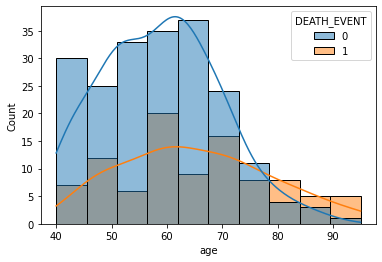

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(x='age', data = df, hue='DEATH_EVENT', kde=True)

위의 그래프는 구하고자 하는 값이 DEATH_EVENT이다. 따라서 결과 값에 따른 age를 확인한 것이다. 주의 할 점은 age가 겹쳐있는 것이 아니라는 것이다.

<AxesSubplot:xlabel='creatinine_phosphokinase', ylabel='Count'>

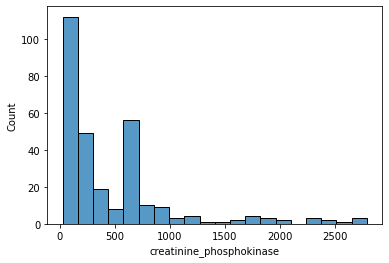

In [16]:
sns.histplot(data=df.loc[df['creatinine_phosphokinase'] < 3000, 'creatinine_phosphokinase'])

- creatinine_phosphokinase 을 보니 아웃라이너가 많은 것을 확인
- 히스토그램으로는 유용한 데이터를 찾기 어려워 보인다.
- 3000 아래의 레코더만 남겨보자. 그러면 좀 더 확실하게 볼 수 있다.
- 그래도, 유용한 통계적 특성이 보이질 않는다.

<AxesSubplot:xlabel='ejection_fraction', ylabel='Count'>

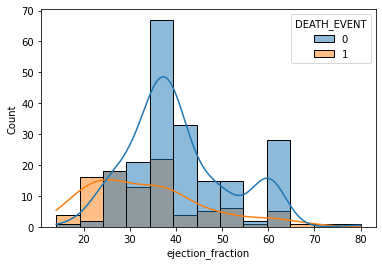

In [36]:
sns.histplot(x='ejection_fraction', data = df, bins=13, hue='DEATH_EVENT', kde=True)

- ejection_fraction이 낮은 사람들이 사망을 많이 한것을 볼 수 있다. 녹은 사람은 사망률이 낮다.
- presision(정확성)을 가져가는데 유용하지만, recall(재현률)을 높이는데 크게 도움이 안 될 것 같다.


위의 그래프는 종속변수(DEATH_EVENT)값과 ejection_fraction을 비교한 값이다. 핵심은, 정확성은 유용하지만, recall을 높이는데 크게 도움이 안될 것 같다는 생각이 든다.

<AxesSubplot:xlabel='platelets', ylabel='Count'>

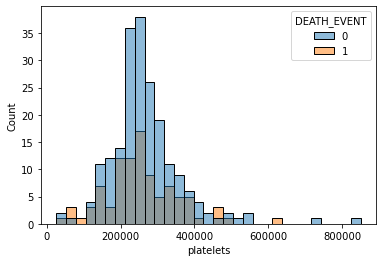

In [37]:
sns.histplot(x='platelets', data = df, hue='DEATH_EVENT')

혈소판 수치의 경우, 정규분포를 그리니 통계적으로 적정해 보임. 하지만 DEATH_EVENT와 관련성이 없어 보인다. 학습에도 크게 도움이 되지 않을 것으로 보인다.

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

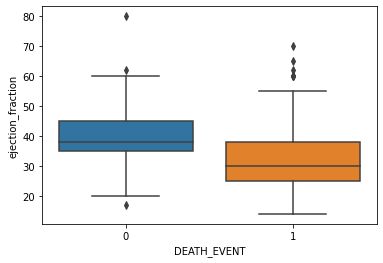

In [38]:
sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data=df)

boxplot으로, outline를 쉽게 확인이 가능하다.
- 결과적으로 시각적으로는 크게 인사이트를 얻기가 힘들다는 것을 알 수 있었다.

#### 전처리하기

연구용 데이터라 그런지, 대부분 데이터가 꺠끗한 상태이다. 그리고 0과 1로 원핫벡터도 잘 되어있는 것을 확인 할 수 있다. 따라서 원핫벡터로 되어있는 것을 제외한 수치형 데이터를 standardScaler를 활용해서 평균을 0으로 std는 1로 바꿔주는 작업만 해주면 될 것 같다.

In [39]:
from sklearn.preprocessing import StandardScaler
X_num = df[['age', 'creatinine_phosphokinase','ejection_fraction', 'platelets','serum_creatinine', 'serum_sodium']]
X_cat = df[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']]
y = df['DEATH_EVENT']
scaler = StandardScaler() 
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(data=X_scaled, index=X_num.index, columns=X_num.columns)
X = pd.concat([X_scaled, X_cat], axis=1)

기존의 데이터 프레임을 X_num에는  scaling을 할 값을 넣어주고, X_cat에는 스케일링이 필요없는 값들을 넣어준다. 그리고 스케일링을 진행한 후에 값들을 합해준다. 결과는 아래와 같이 나온다. ( 0과 1로 원핫벡터로 되어 있는것은 X_cat 으로 넣은것)

In [41]:
X.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia,diabetes,high_blood_pressure,sex,smoking
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,0,0,1,1,0
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,0,0,0,1,0
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,0,0,0,1,1
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,1,0,0,1,0
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,1,1,0,0,0


#### 데이터분리

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

#### 모델 학습 및 결과 평가

In [56]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [57]:
from sklearn.metrics import classification_report
pred = model_lr.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.67      0.91      0.77        53
           1       0.72      0.35      0.47        37

    accuracy                           0.68        90
   macro avg       0.69      0.63      0.62        90
weighted avg       0.69      0.68      0.65        90



90의 데이터로 평가한 것이 68%의 정확도를 가진다는 것을 알 수 있다.

#### xgboost 사용하기

In [61]:
#!pip3 install xgboost

In [60]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

[19:09:15] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/goldang/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [62]:
pred = model_xgb.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.68      0.89      0.77        53
           1       0.71      0.41      0.52        37

    accuracy                           0.69        90
   macro avg       0.70      0.65      0.64        90
weighted avg       0.69      0.69      0.67        90



90의 데이터로 평가한 것이 69%의 정확도를 가진다는 것을 알 수 있다. 아주 조금 정확도를올렸다.

<function matplotlib.pyplot.show(close=None, block=None)>

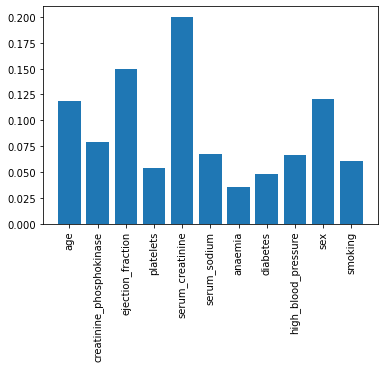

In [66]:
plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90) # x축 글자 겹치기때문에 90도 회전
plt.show

컬럼별 중요도를 나타낸다.

#### Precision-Recall 확인하기

로지스틱회귀와 XGBoost의 비교

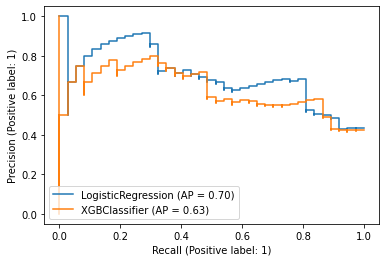

In [67]:
from sklearn.metrics import plot_precision_recall_curve
fig = plt.figure()  # figure하나를 만들어 주자.
ax = fig.gca()  # gca를 사용해서 ax를 사용할 수 있다.
plot_precision_recall_curve(model_lr, X_test, y_test, ax=ax)
plot_precision_recall_curve(model_xgb, X_test, y_test, ax=ax)

Recall을 증가시키면서 Precision이 어떻게 나오는지를 확인하는 것이다. 그림에 보면 AP라는게 있다. Precision이 AP값이 높을 수록 Recall을 증가시키면서 잘 유지했다는걸 의미한다. 따라서 AP가 1에 가까울 수록 좋은거다. 위 그림을 보면 로지스틱회귀가 일반적으로 XGBClassifier보다 위쪽에 있는것을 보면, 이번에는 로지스틱회귀가 좋은 성능을 만들고 있다는 것을 알 수 있다.

 

####  ROC 커프 활용하기

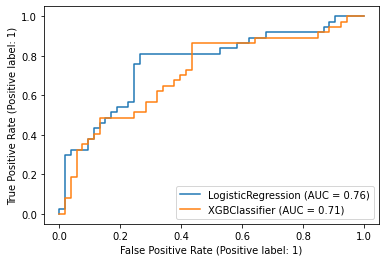

In [68]:
from sklearn.metrics import plot_roc_curve
fig = plt.figure()
ax = fig.gca()
plot_roc_curve(model_lr, X_test, y_test, ax=ax)
plot_roc_curve(model_xgb, X_test, y_test, ax=ax)

위 그림을 보면 각 축에 True Positive Rate와 False Positive Rate 2가지가 나오는 것을 알 수 있다. 우리의 목적은 False Positive Rate를 낮게 유지하고 싶은 것이다.따라서 False Positive Rate가 빨리 증가하면서 빨리 1에 가까워지는 것을 보고 싶은것이다. 따라서 위쪽에있는게 더 좋은거다. 이번에도 로지스틱 회기가 조금 더 좋은 걸로 나온다.